In [1]:
%env THEANO_FLAGS=device=gpu2
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

env: THEANO_FLAGS=device=gpu2


In [2]:
from utils.southpark import get_conversations
conversations = get_conversations("/srv/hd7/jheuristic/cartman/sp.json")
    
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conversations,verbose=True)


100%|██████████| 7285/7285 [00:03<00:00, 2063.84it/s]


23281 out of 23281 tokens, coverage=1.00000)


# Idea
Try to multiply loss at the EOS by some number to make NN learn to stop faster.

Start from southpark_simple_cm_cartman_epoch6484.pcl that was pre-trained on 10-word sequences without any loss tweaks.

# model

In [6]:
from models.twoline_emphacize_eos import ConversationModelEmphEOS
model = ConversationModelEmphEOS(preproc,bottleneck_size=512)

In [7]:
from agentnet.utils import load
load(model.decoder_training_rec,"/srv/hd7/jheuristic/agentnet_snapshots/southpark_simple_cm_cartman_epoch6484.pcl")

# training

In [11]:
max_len=30
batch_size=100
n_epochs=100

In [12]:
from utils.generate import get_phrase_pairs,iterate_minibatches

convs_ix = list(preproc.preprocess_conversations(conversations,verbose=True,max_len=max_len))

prev_phrases,reference_answers = get_phrase_pairs(convs_ix,
                                                  speaker_filter = lambda s1,s2: 'cartman' in s2).swapaxes(0,1).astype('int32')




100%|██████████| 7285/7285 [00:04<00:00, 1578.33it/s]


In [13]:
epoch_counter = 1
ce = []

25 iterations...
50 iterations...
75 iterations...
beginning new loop...


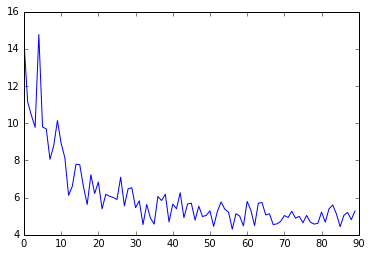

A: no , i
B: we can go fuck here . just here , butters , you do okay , you're just fuck okay here and you happy all
B true: fuck you , asshole . you can go fuck yourself !
100 iterations...
125 iterations...
150 iterations...
175 iterations...
beginning new loop...


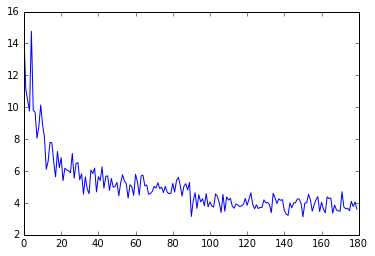

A: you see ,
B: and we are know . really got an a man was it's just payment : he just tell him all all stop the
B true: oh , i get it .
200 iterations...
225 iterations...
250 iterations...
beginning new loop...


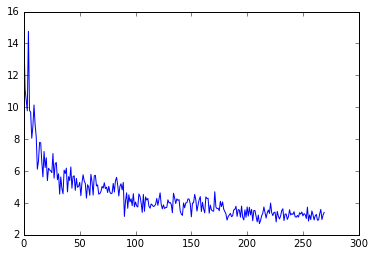

A: what's that ?
B: kyle , do you all the time before , my soul can't do ! be my
B true: i don't know , but it sounds pretty
275 iterations...
300 iterations...
325 iterations...
350 iterations...
beginning new loop...


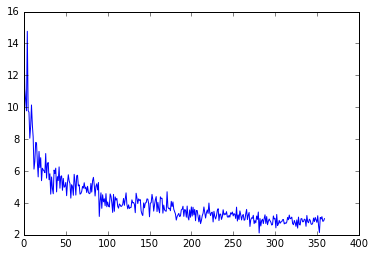

A: . . . close your eyes and suck it out of a hose ?
B: it , billy , we've gotta be going that to play myself . really . be they'll fine for stop that the
B true: uh - huh , suck it out of a hose , yeah .
375 iterations...
400 iterations...
425 iterations...
450 iterations...
beginning new loop...


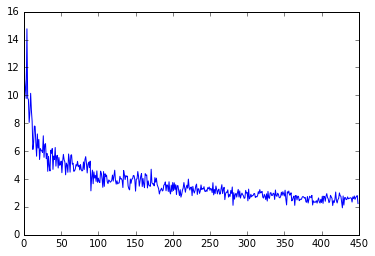

A: cartman , what the hell is all this ?
B: i know about that second dude ! all my friend of the chick side . go and it's don't tough the see me be
B true: our platinum album ceremony . i spared no expense .
475 iterations...
500 iterations...
525 iterations...
beginning new loop...


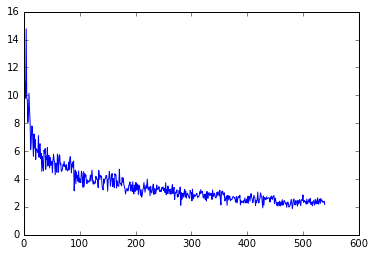

A: no , pussy , i'm taking you to my village .
B: it is sweet . be . all now i'm quiet alone . be just ? find that other little bring the be be miami be just my mouth
B true: oh , your pussy village ?
550 iterations...
575 iterations...
600 iterations...
625 iterations...
beginning new loop...


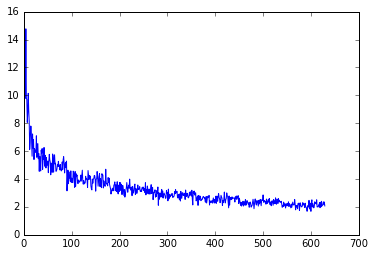

A: but mo - o - o -
B: who cares ? but they will you tell my report !
B true: " but
650 iterations...
675 iterations...
700 iterations...
beginning new loop...


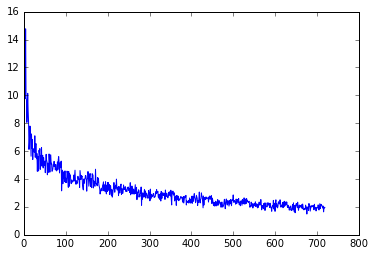

A: eric , that's enough ! not all muslim people are terrorists !
B: it , no more way out of my phenomenal ! have some have down ! at society . me see the food better convince me post have
B true: no , but most of them are . and all it takes is most of them .
725 iterations...
750 iterations...
775 iterations...
800 iterations...
beginning new loop...


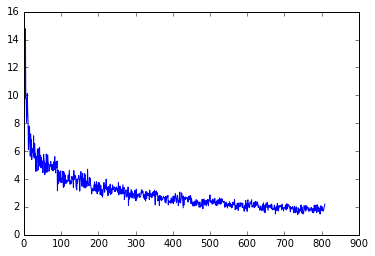

A: it's time for school
B: this is , mom ! go ! . . . really are you !
B true: no mom , you don't understand ! i've been waiting for this thing to come out for months . and now , every day time is slowing down .
825 iterations...
850 iterations...
875 iterations...
900 iterations...
beginning new loop...


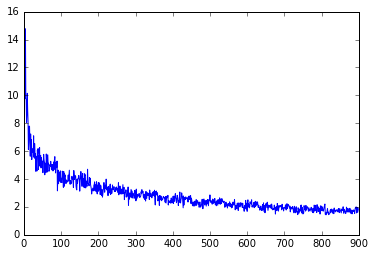

A: my , my picture ?
B: you're going to be the face of queef , why don't you ! tell me , those money , think some sister , se ! be not , tell over , some . the the the okay
B true: you're going to be the face of queef abuse , butters , so that we can make people open their eyes .
925 iterations...
950 iterations...
975 iterations...
beginning new loop...


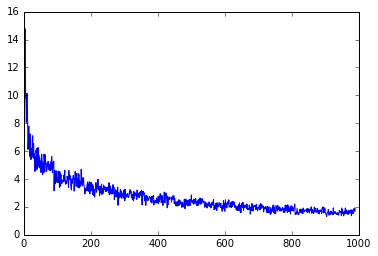

A: all right boys , just do what i tell ya and we'll be able to sue this tobacco company for two billion dollars !
B: it , for enough of god - damned people ! look for the way ! show the finals against now , kyle . shut kyle have to an the is is the video where is be the
B true: handle it ? for two billion dollars i'd handle my grandpa's balls , sir .
1000 iterations...
1025 iterations...
1050 iterations...
1075 iterations...
beginning new loop...


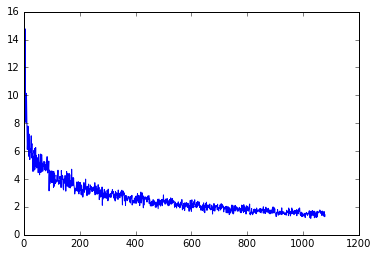

A: what are you doing , cartman ?
B: i'm going to kill me ! good to get some . - who up to have to be find what !
B true: they're going to kill me !
1100 iterations...
1125 iterations...
1150 iterations...
beginning new loop...


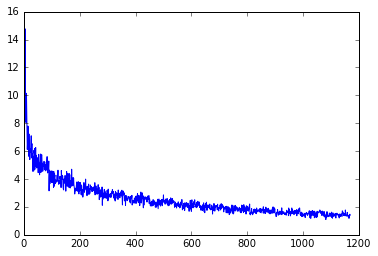

A: oh , if i could only have a park that worked like
B: not ? all these second ? be say
B true: hey , there you are !
1175 iterations...
1200 iterations...
1225 iterations...
1250 iterations...
beginning new loop...


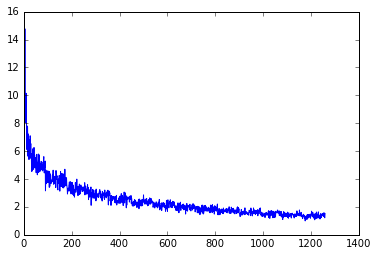

A: there's a guy selling them downtown . but they're not made from recycled plastic .
B: it , they already have a picture of your mouth ! okay be fine !
B true: dude , i don't give a crap about using recycled plastic !
1275 iterations...
1300 iterations...
1325 iterations...
1350 iterations...
beginning new loop...


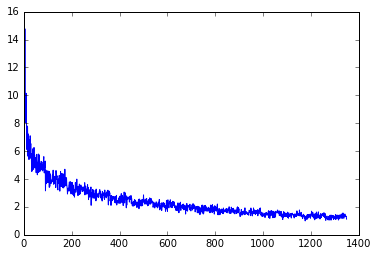

A: and for those of you just joining us , this is the stingray tank . stingrays are members of the shark family , but they're extremely peaceful creatures .
B: it ! be my new best new people . change be kick your be
B true: heh ! come on , stingray !
1375 iterations...
1400 iterations...
1425 iterations...
beginning new loop...


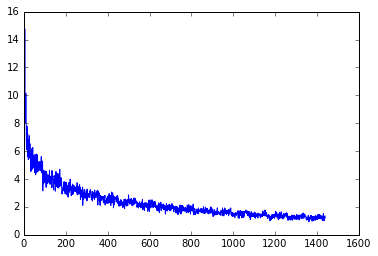

A: you dumbass , cartman !
B: it , but i always . nothing . all over a tooth fairy , you will were the more .
B true: hey , i was under duress ! maybe it waaas this one .
1450 iterations...
1475 iterations...
1500 iterations...
1525 iterations...
beginning new loop...


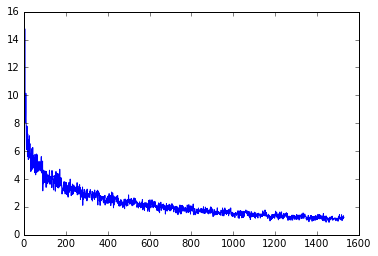

A: you shut up ,
B: it doesn't matter . you can go care ! all right ? see the chinese person
B true: you shut up ,
1550 iterations...
1575 iterations...
1600 iterations...
beginning new loop...


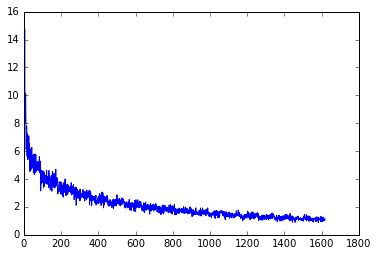

A: that's an interesting question , kurt . but first i'd just like to say that i really hate this kid named scott tenorman . he's stupid .
B: it , i'm not too late again , and all scott malkinson ! be just . . ! be
B true: oh , jesus , did you hear that , scott ?
1625 iterations...
1650 iterations...
1675 iterations...
1700 iterations...
beginning new loop...


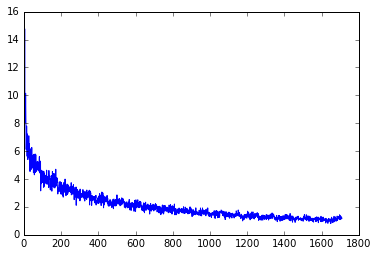

A: i knew you were doing something terrible !
B: i'm not awesome , kyle ! the president of us that goes away . your one of us is ! here you
B true: what's terrible , kyle ? ! we fill a little ball with crack , we let the crack babies fight over it , and we put it up on
1725 iterations...
1750 iterations...
1775 iterations...
1800 iterations...
beginning new loop...


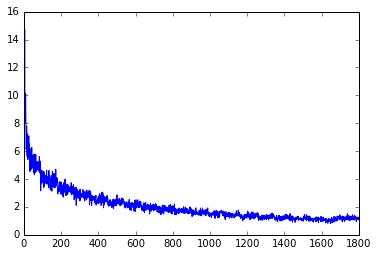

A: i'm right here .
B: who would you need to be here , or we can do i'm just a little moment ? go out ,
B true: who , who is this ?
1825 iterations...
1850 iterations...
1875 iterations...
beginning new loop...


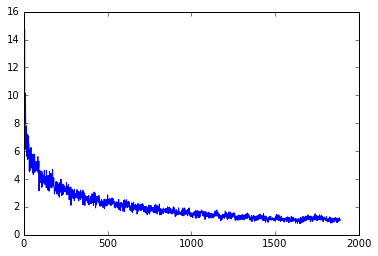

A: you see boys , the democrats have passed a lot of laws trying to stop us from hunting .
B: democrats people , wendy ? do the 99 been a guy attack . i suppose it's sure ! just go ! talk
B true: democrats piss me off !
1900 iterations...
1925 iterations...
1950 iterations...
1975 iterations...
beginning new loop...


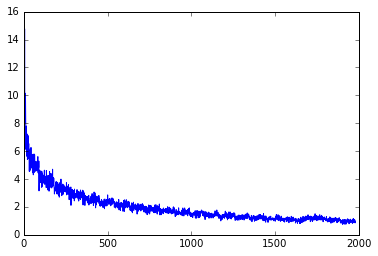

A: no !
B: everything ! be my . go ! all the time here you ? your time , i'll see our sins - take
B true: no , go ahead . i'm dry .
2000 iterations...
2025 iterations...
2050 iterations...
beginning new loop...


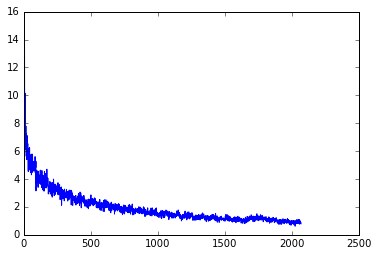

A: oh gohhhd .
B: no , it's okay . we need to take . tell something i big is . over the cover some country and come some world , fake ,
B true: we need to speak with you , ma'am .
2075 iterations...
2100 iterations...
2125 iterations...
2150 iterations...
beginning new loop...


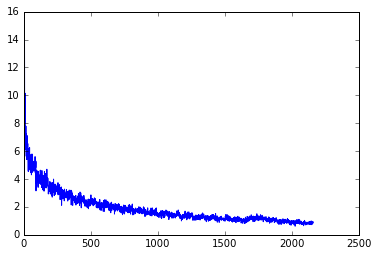

A: what ?
B: guess you know your girlfriend's going around tellin' your mom are inside that last services , she won't let pete people tank . we
B true: but then , who played at my eighth birthday party ?
2175 iterations...
2200 iterations...
2225 iterations...
2250 iterations...
beginning new loop...


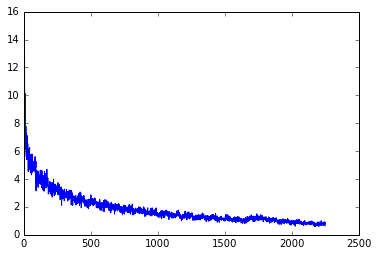

A: hey ! it's one of the boys from south park who slandered me !
B: it's really i need . i can be a monitor with my farts . you wanna be all the big thing listener .
B true: i didn't come for myself . i just came as an escort for another celebrity who wants in on your lawsuit . . .
2275 iterations...
2300 iterations...
2325 iterations...
beginning new loop...


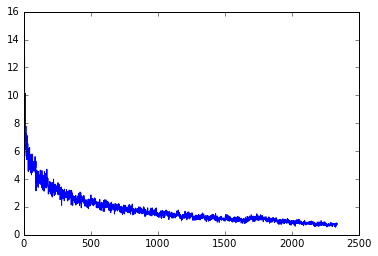

A: because lorde is my dad , alright ? !
B: it , kenny . be god , funny !
B true: what ?
2350 iterations...
2375 iterations...
2400 iterations...
2425 iterations...
beginning new loop...


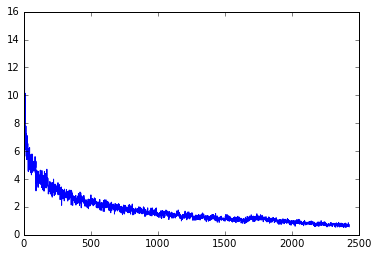

A: jesus , we made it just in time !
B: excuse us out of here , you can gotta kill me do that feels some more , and you're talking to a
B true: excuse us !
2450 iterations...
2475 iterations...
2500 iterations...
beginning new loop...


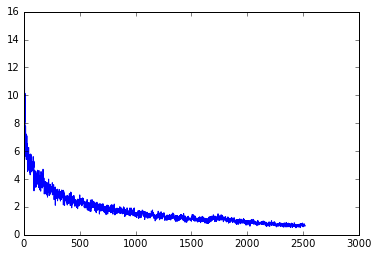

A: haha ! that was a turd trick . your mom isn't really dead !
B: what we hate this ? . . day day day day here the day is day ! just start
B true: a
2525 iterations...
2550 iterations...
2575 iterations...
2600 iterations...
beginning new loop...


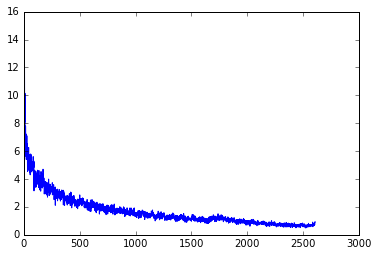

A: hi guys .
B: hi wendy . my . all this looks be christmas and make me back to god , damnit .
B true: oh look , another hippie .
2625 iterations...
2650 iterations...
2675 iterations...
2700 iterations...
beginning new loop...


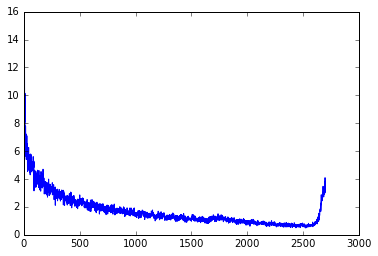

A: if you look through david blaine's incredible book , you'll find a lot of life's answers . let's read some of the book together , shall we ?
B: it works in serious ! just get me the chinese is feeling four wok
B true: then we get to be in david blaine's secret club ?
2725 iterations...
2750 iterations...
2775 iterations...
beginning new loop...


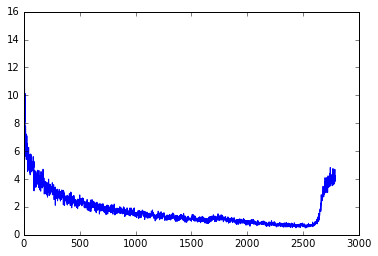

A: awe , come on , lay off him guys .
B: a new saturday ? suck
B true: oh , what are you ? ! a cissy too , clyde ? !
2800 iterations...
2825 iterations...
2850 iterations...
2875 iterations...
beginning new loop...


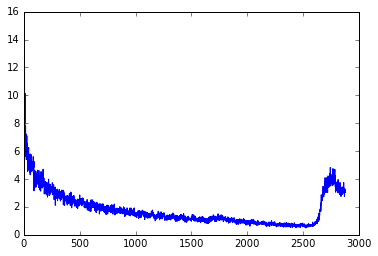

A: wha - what are you talking about , eric ?
B: pffft . like all tell me based on stan
B true: you know , there's always like five or six minorities wearing their t - shirts in the wave pool , pisses me off .
2900 iterations...
2925 iterations...
2950 iterations...
beginning new loop...


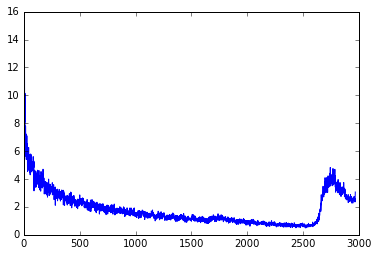

A: i know that the nsa is torturing santa , sweetie . but they're keeping us safe .
B: well then you know , kyle ! kenny good just will you get with me . just suck .
B true: well now you just sound like everybody eeeelse ? !
2975 iterations...
3000 iterations...
3025 iterations...
3050 iterations...
beginning new loop...


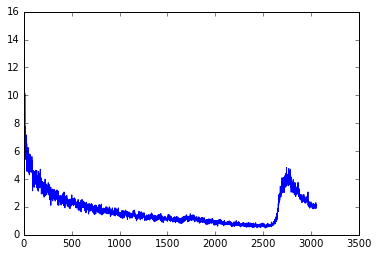

A: oh , i'm so glad you think so , shawna , because i really wanna stick my penis in your vagina .
B: a - - uh - huh , i blew time bad - tell you !
B true: yes , nice , jimmy , very nice .
3075 iterations...
3100 iterations...
3125 iterations...
3150 iterations...
beginning new loop...


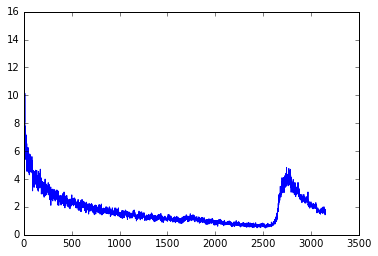

A: that's the chemical equation for gold ?
B: wow , cool . see , what the first about a second . tell me ? be , television !
B true: that's right .
3175 iterations...
3200 iterations...
3225 iterations...
beginning new loop...


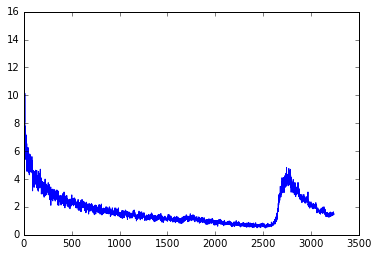

A: hey eric , eric !
B: who ? - you just made my underwear and christmas now . look , and as night
B true: what ?
3250 iterations...
3275 iterations...
3300 iterations...
3325 iterations...
beginning new loop...


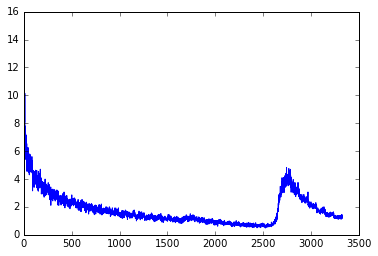

A: from what ? who is this ?
B: now , i've called all something has all two day with our way . just go with my guys like she ?
B true: i've just id'd a muslim and his myspace page does not check out . you've got to get these people out of here now !
3350 iterations...
3375 iterations...
3400 iterations...
beginning new loop...


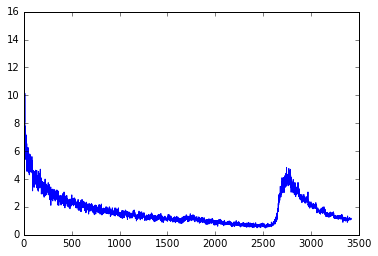

A: how come you get to use it first ?
B: it , do it is ? no i see that i can wrestle into the wall of myself . .
B true: because i do , clyde .
3425 iterations...
3450 iterations...
3475 iterations...
3500 iterations...
beginning new loop...


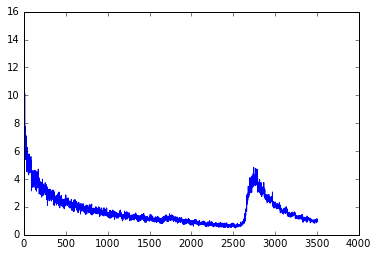

A: uh uh ! you children are gonna get me in trouble with the principal again .
B: lunchtime ! it's starved ! totally asshole ! i don't know you ! see you ! say , all their damnit ass in too ,
B true: lunchtime ! i'm starved !
3525 iterations...
3550 iterations...
3575 iterations...
3600 iterations...
beginning new loop...


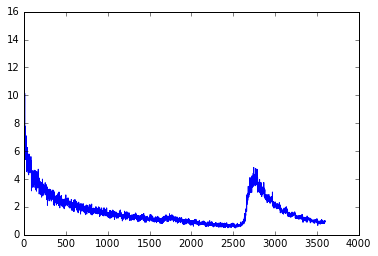

A: poop - poop swatches ?
B: poop comes in the video time and alec baldwin dad . be raped with token
B true: poop comes in a lot of varieties , butters . i wanna find the perfect one , tailored to your revenge on your parents .
3625 iterations...
3650 iterations...
3675 iterations...
beginning new loop...


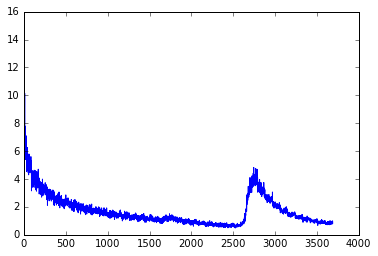

A: cartman ? cartman ? !
B: what ? see what you care ? get kyle ! come out of the two ! look at it's nice ! me
B true: wha - uh , what ? ? what ?
3700 iterations...
3725 iterations...
3750 iterations...
3775 iterations...
beginning new loop...


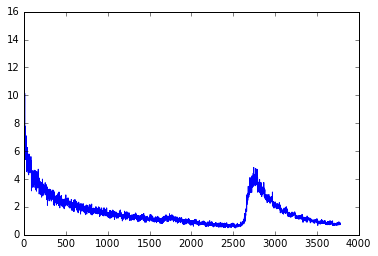

A: yeah .
B: five balls ? all the better just get me to my mouth plan ? the wait , stan .
B true: nah - ah ! i'm just a better debater than you guys !
3800 iterations...
3825 iterations...
3850 iterations...
beginning new loop...


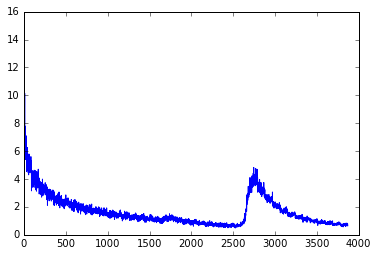

A: hello , children !
B: ma'am , we can know what the hell office , i was were getting in what drinks of the future .
B true: ma'am , we're having a dude moment here , if you don't mind ?
3875 iterations...
3900 iterations...
3925 iterations...
3950 iterations...
beginning new loop...


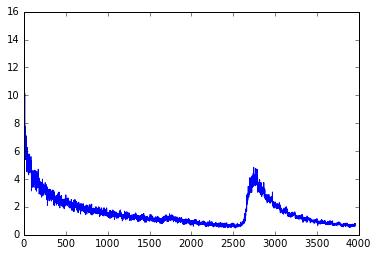

A: nope .
B: egh , god - dammit ! this is very alright ! tell the chicken , just are out of .
B true: egh . god damn it !
3975 iterations...
4000 iterations...
4025 iterations...
4050 iterations...
beginning new loop...


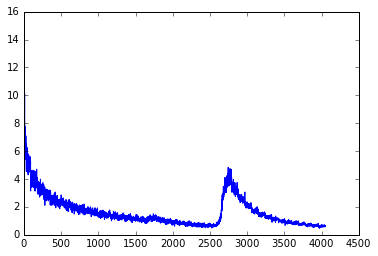

A: jesus is a lie ?
B: it was just . son of my friend kyle , it is very fun of god ! is that , huh i just
B true: no way jesus was son of god , huh , butters ?
4075 iterations...
4100 iterations...
4125 iterations...
beginning new loop...


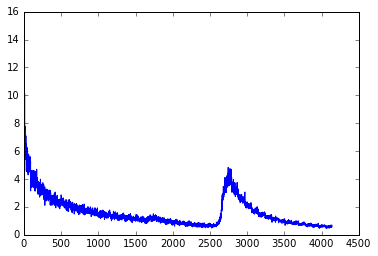

A: but i'm the only one down here . what am i supposed to repopulate with ?
B: well , guess , i guess . . . you know what your most time , are going to know that i'm gonna really is a friend
B true: well , you know , with your wiener .
4150 iterations...
4175 iterations...
4200 iterations...
4225 iterations...
beginning new loop...


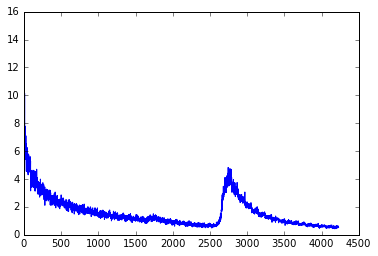

A: wow !
B: now , i want to the bathroom . .
B true: man , vietnam was sweet !
4250 iterations...
4275 iterations...
4300 iterations...
beginning new loop...


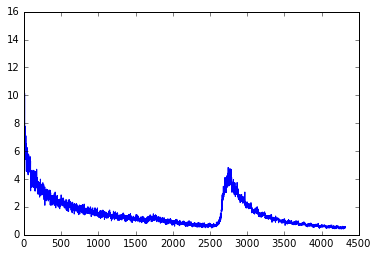

A: yeah maybe we should think about this .
B: and what does that we are ? go , is not three days .
B true: you guys , the fuck ? are you forgetting how crappy your lives are ? ! all the homework , the rules ? ! butters , do you really
4325 iterations...
4350 iterations...
4375 iterations...
4400 iterations...
beginning new loop...


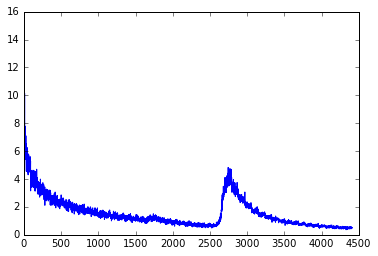

A: come on , cartman ! how much do you wanna bet the south doesn't win ? !
B: what , sir , who did i do a call me ? ! really think you're a good listener .
B true: well , this war is about slavery , so how about if the south wins , you two assholes have to be my slaves for a month .
4425 iterations...
4450 iterations...
4475 iterations...
4500 iterations...
beginning new loop...


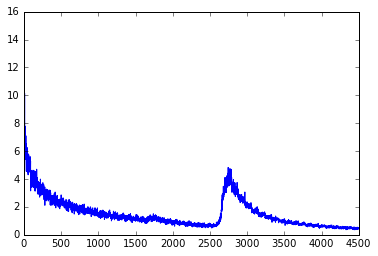

A: here , look at this one . toshiba handibook .
B: toshiba handibook ? ? what the commercials ? go a little bit , am going to the school ? the start
B true: toshiba handibook ? ?
4525 iterations...
4550 iterations...
4575 iterations...
beginning new loop...


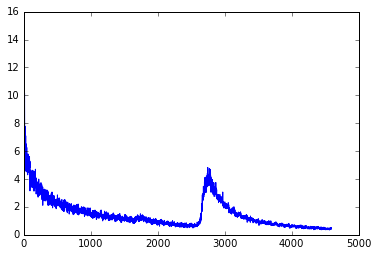

A: wing ?
B: wing ? is the wing ? is the lord ? be wrong , and your face !
B true: wing ? here , wing !
4600 iterations...
4625 iterations...
4650 iterations...
4675 iterations...
beginning new loop...


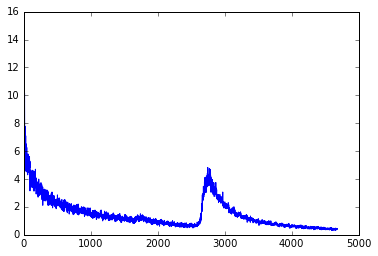

A: oh , no . quite the contrary . eric showed up and surprised me last night . ladies and gentlemen , i would like to present to you .
B: hey you guys know what ? oh . i put ah all he getting ah my next . go what
B true: hey , dudes !
4700 iterations...
4725 iterations...
4750 iterations...
beginning new loop...


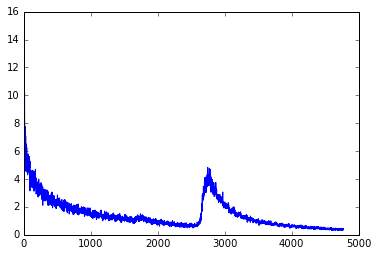

A: it better be ! i am hennifer lopez !
B: it is , my best kyle is at her . really talk it . just really the fuck comes .
B true: nonono , you're jennifer lopez
4775 iterations...
4800 iterations...
4825 iterations...
4850 iterations...
beginning new loop...


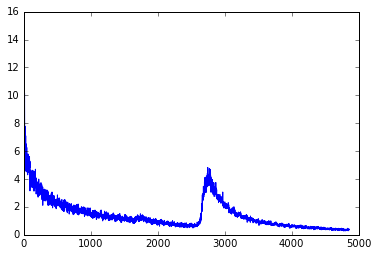

A: no , you just have to study .
B: two . like that four on the evil school , and i won't do do . - our school can we're breaking gets a white time . thank me .
B true: nonono . i've seen this work before . just give me a second .
4875 iterations...
4900 iterations...
4925 iterations...
4950 iterations...
beginning new loop...


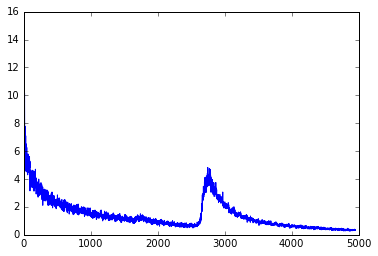

A: yes .
B: this is a bad before , kyle ? well , i think it's kyle , i've never have to eat me , it's .
B true: that's right . i got a bad case of add . no homework for me .
4975 iterations...
5000 iterations...
5025 iterations...
beginning new loop...


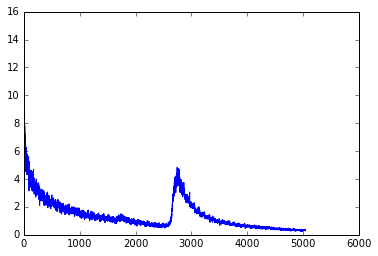

A: poop - poop swatches ?
B: poop comes in a lot of varieties , butters . i wanna go , dude . i never left each right . just
B true: poop comes in a lot of varieties , butters . i wanna find the perfect one , tailored to your revenge on your parents .
5050 iterations...
5075 iterations...
5100 iterations...
5125 iterations...
beginning new loop...


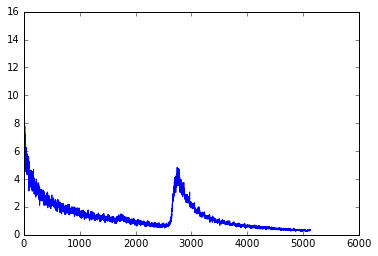

A: it has to be , eric .
B: how work my mind , we can you tell my how ? go
B true: get me my coat , butters . we're gonna try this thing again .
5150 iterations...
5175 iterations...
5200 iterations...
beginning new loop...


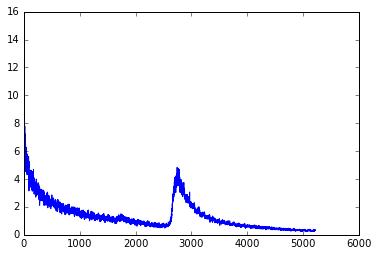

A: any goo can be harvested from a person's body , and easily placed into another .
B: it wait , wait . i wanna get into some guys . we do we do to do it we made him we we we
B true: wait , wait , wait , you mean we aren't going to sue and get a bunch of money ?
5225 iterations...
5250 iterations...


KeyboardInterrupt: 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
for _ in range(n_epochs):
    for b_x,b_y in iterate_minibatches([prev_phrases,reference_answers],batch_size,shuffle=True):
        ce.append(model.train_fun(b_x,b_y))
        
        epoch_counter +=1
        
        if epoch_counter %25==0:
            print epoch_counter,'iterations...'
    print "beginning new loop..."
    plt.plot(ce)
    plt.show()
    
    ph =preproc.ix_to_phrase(b_x[0])
    print 'A:', ph
    print 'B:', model.reply(ph)
    print 'B true:',preproc.ix_to_phrase(b_y[0])
        

In [15]:
from agentnet.utils.persistence import save
save(model.decoder_training_rec,"/srv/hd7/jheuristic/agentnet_snapshots/southpark_simple_cm_cartman_emph_EOS_epoch%i.pcl"%epoch_counter)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [18]:
model.reply("Hi dude")

u"would haven't her to tell them again ? just play me are down looking the episode - me , kyle ."